# The numpy.random Package  ![Numpy Logo](  https://numpy.org/doc/stable/_static/numpylogo.svg)
***

## Setup

Firstly set up an environment by importing the required modules in order to examine this module and enable demonstrations of the concepts.
To see the cell below click on the three dots.

In [3]:
#import required modules for demonstration
import numpy as np                #python module that specializes in arrays and random numbers
import matplotlib.pyplot as plt   #module to visualize finding s in charts, plots, etc
import math                       #not sure if needed - check later
import seaborn as sns             #makes plots prettier sits on top of pyplot
import matplotlib.image as img    #used to display images from file
from PIL import Image

%matplotlib inline

In [2]:
#function to resize images
def resize_deck(deck,size):
    #print(deck)
    resized =[]
    for suit in deck:
        #print(suit)
        for card in suit:
            #print(card)
            cardImage = "Images/"+ str(card.lower()).replace(" ","_")+".png"
            img = Image.open(cardImage)
            rsize = img.resize((np.array(img.size)/5).astype(int))
            arr = np.array(rsize)
            resized.append(arr)
    for i in range(13,size+13,13):
        #print(i-13,i)
        display(Image.fromarray(np.hstack(resized[i-13:i])))


In [3]:
#build a deck of cards
suitNames = ["Clubs","Diamonds","Hearts","Spades"]
card = [2,3,4,5,6,7,8,9,10,"Jack","Queen","King","Ace"]

deck = []
for s in suitNames:
    suit = []
    for c in card:
        suit.append(str(c) + " of " + s)
    deck.append(suit)
#take a copy

freshDeck = deck.copy()
#print(len(deck))

In [4]:
# Plot size.
plt.rcParams["figure.figsize"] = (10, 6)

# Pyplot style.
plt.style.use('seaborn')

## Overview
There are an abundance of tutorials, documentation , jupyter notebooks, etc on the numpy.random package available on the web( some of the best are mentioned in the resouces section of this notebook below).  
This is not an attempt at a tutorial or an in-depth discussion of any of the features of the package( which is best left to the experts), moreover it is a quick overview of what is available in the package, how to use it, brief explanations of their purpose, illustrations and where to go for further information.
<br>   
Numpy.org documentation pages state that:  
"Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions."[2]
<br>   
What exactly does this mean? 
<br>   
Lets take a look at what random numbers, pseudo random numbers, bit generators, generators, sequences, sampling and statistical distributions are.
<br>   



***

### Random Numbers
#### Intro  
Random numbers are useful for a variety of purposes, such as generating data encryption keys, simulating and modeling complex phenomena and for selecting random samples from larger data sets. They have also been used aesthetically, for example in literature and music, and are of course ever popular for games and gambling. When discussing single numbers, a random number is one that is drawn from a set of possible values, each of which is equally probable, i.e., a uniform distribution. When discussing a sequence of random numbers, each number drawn must be statistically independent of the others.*--from random.org rephrase and cite*   
There are two methods of obtaining a random number
#### True random
A true random number is one that is generated by a physical phenonamon such as radio static, etc *- expand*

#### Pseudo random

A pseudo random number is one that has been generated by an algorithm on a computer and as such, because algorithms are stochastic processes i.e. the outcome is predictable, they are not true random numbers hence the term pseudo. Pseudo random numbers are not used in cryptography for this very reason *--- verify and rephrase*

### Generators

Generators are computer algorithms to produce pseudo random numbers
#### Bit gen
A bit generator  will generate a bit *-explain*
#### Gen
A generator will use a bit generator to form a sequence of random numbers *-- clarify*

set up a random number generator and seed it for us in this notebook. Seeding is explained below in more detail toward the end of this notebook. Here it allows us to generate the same set of random numbers throughout the noteboook each time it is used.

In [4]:
rng = np.random.default_rng(seed=1)

***

## “Simple random data” and “Permutations”
https://numpy.org/doc/stable/reference/random/generator.html#simple-random-data
### Simple random data
#### Integers
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

This will draw random integers from a range of numbers(this functions draws them from the uniform distribution which is discussed below under distributions). For example a dice normally has with six faces with the dots on each face representing the numbers 1 to 6, if we were to generate a random number in the range one to six this would simulate a roll of the dice and if we were to do this 10 times we could simulate the outcome of 10 rolls of the dice.


In [38]:
from ipywidgets import interact_manual

In [47]:
#interact_manual.options(manual_name="Roll Dice")
#interact_manual(description='Roll Dice')
interact_roll_dice=interact_manual.options(manual_name="Roll dice")
@interact_roll_dice

def roll_dice():
    #Roll the dice
    face = rng.integers(1,6,endpoint=True)
    print("The dice face is showing ",face)
    dice_face="Images/Alea_"+str(face)+".png"
    img = Image.open(dice_face)
    rsize = img.resize((np.array(img.size)/1).astype(int))
#image = img.imread(dice_face)
#plt.axis("off")
#plt.title=drawn
#plt.imshow(image)
#plt.show()
    display(rsize)

interactive(children=(Button(description='Roll dice', style=ButtonStyle()), Output()), _dom_classes=('widget-i…

In [21]:
#Roll the dice ten times
rolls = rng.integers(1,6,size=10,endpoint=True)
print(rolls)

[2 3 5 1 2 1 3 6 1 3]


#### Random
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

Random wil return random floating point numbers between 0 and 1 excluding the 1 ie. 0.5, 0.99999.

Results are from the “continuous uniform” distribution over the stated interval. -- *from the docs link above*   

This can be useful as probabilites are usually expressed as floating point numbers in the range 0,1

#### Choice
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
<br>   
Choice will return a random sample from a given array, to illustrate this I will use the deck of cards to return one card drawn randomly from the deck. In this example  the size paramaeter is none, however Choice can be used to return more than one item.

##### Draw a card from a deck of cards

Jack of Diamonds


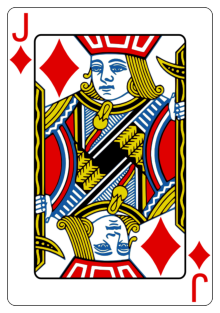

In [8]:
#flatten the deck so all cards in all suits are available
deck = np.array(freshDeck).flatten().tolist()
#draw a card from the dsck using Choice
drawn = rng.choice(deck)
print(drawn)
cardDrawn = "Images/"+ str(drawn.lower()).replace(" ","_")+".png"
image = img.imread(cardDrawn)
plt.axis("off")
plt.title=drawn
plt.imshow(image)
plt.show()

##### Deal a hand from the deck
Choice can also be used to "deal" a hand from the deck, in order not to repeat a card in the sample the default parameter replace=True needs to be set to False. For illustration lets deal 5 cards from the deck.

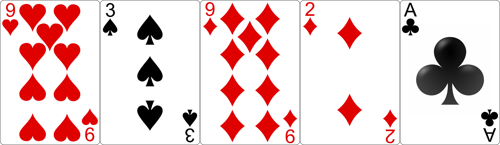

In [9]:
hand = rng.choice(deck,5,replace=False)
#print(hand)
resize_deck(np.array(hand).reshape(1,5),5)

***   

#### Bytes
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

***   


### Permutations
#### shuffle
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

The function shuffle will randomly rearrange the elements in an array, much like as in when shuffling a deck of playing cards.
Lets set up a deck of cards to demonstrate.

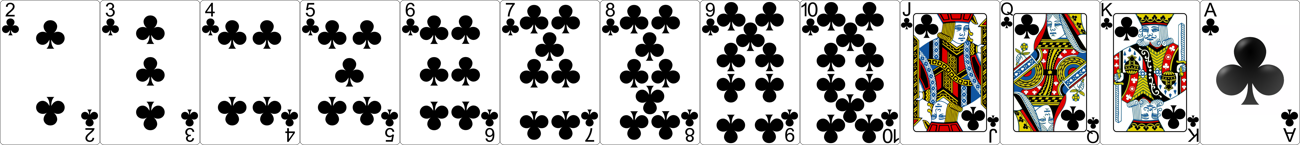

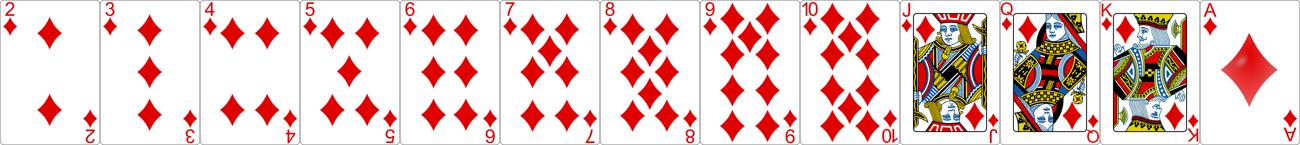

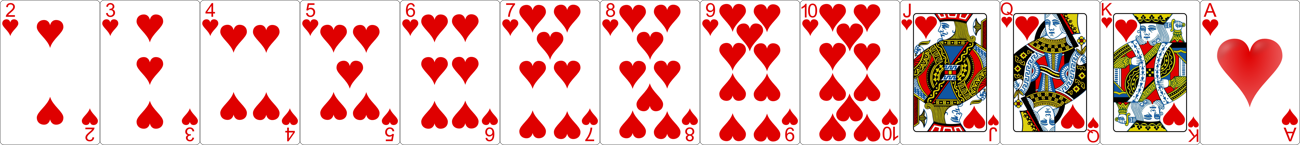

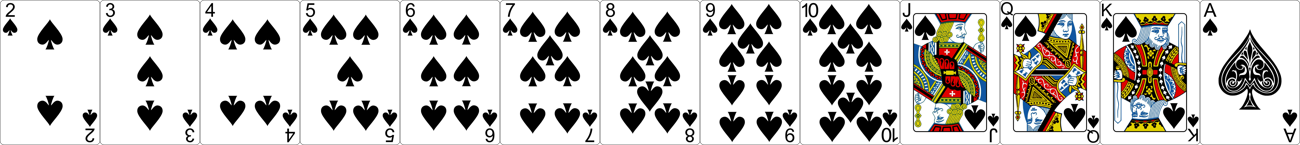

In [10]:
#resize the images for display purposes and output to screen

resize_deck(np.array(deck).reshape(4,13),52)

#### "Shuffle the Deck"

In [11]:
#flatten it to a list so all cards are "shuffled" ignoring axes
deck = np.array(freshDeck).flatten().tolist()
rng.shuffle(deck)

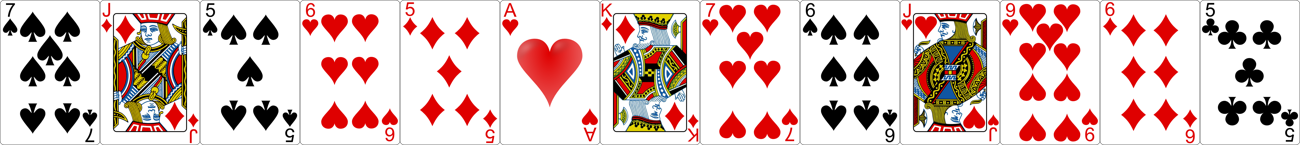

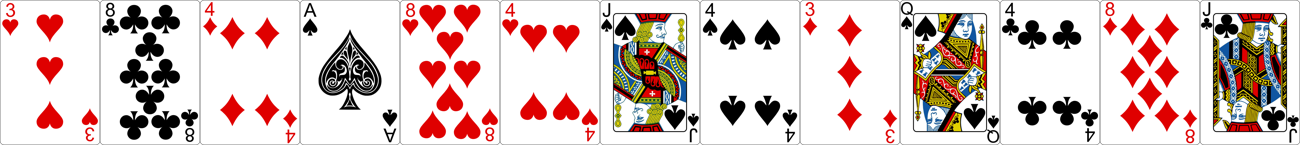

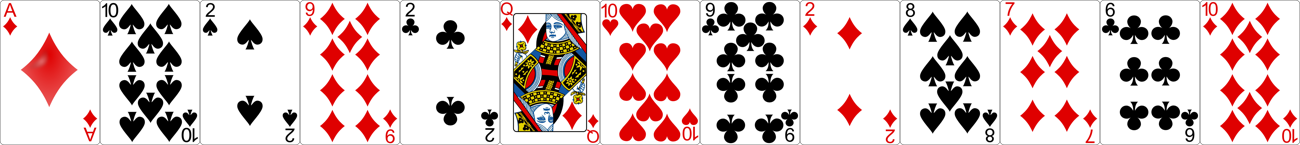

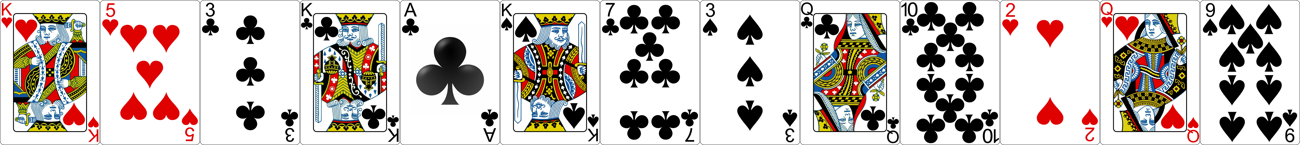

In [12]:
#resize expects a 4x13 array so reshape it prior to passing it in
resize_deck(np.array(deck).reshape(4,13),52)
#print(Deck)

#### permutation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

similar to shuffle this will permutate the elements in a given array or an array passed to it   
as an example pass a suit from the deck of cards

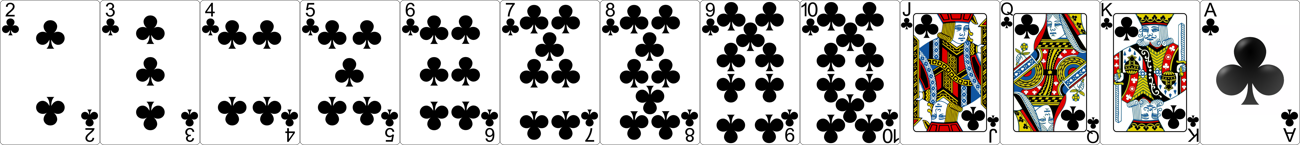

In [13]:
#take a slice of the original deck
suit = np.array(freshDeck[0]).reshape(1,13)
resize_deck(suit,13)

pass the suit(slice) to the permutation function and resize it for display purposes

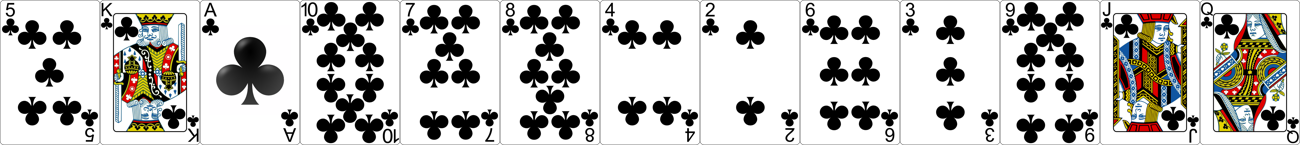

In [14]:
resize_deck(rng.permutation(suit,axis=1),13)

#### permuted
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted

similar to both shuffle and permutation this allows granularity on permuting or shuffling elements of an array along a chosen axis. It allows a copy to be taken or can be done in-place.   
Lets rearrange the Deck to represent the four suits as arrays of single suits within the deck.

 

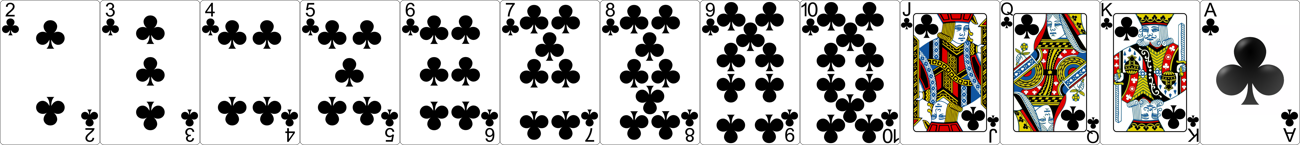

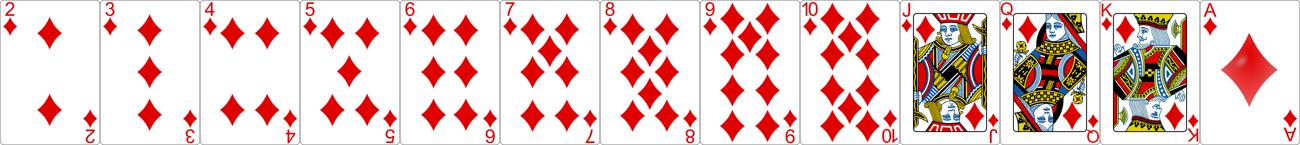

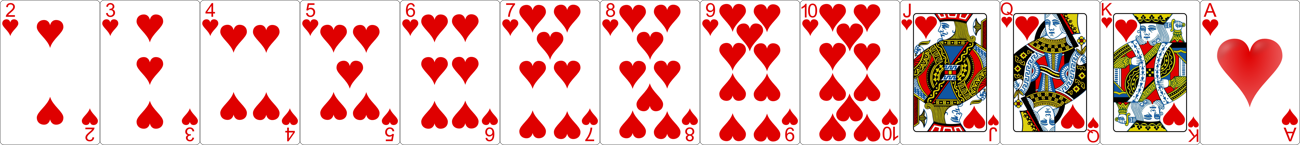

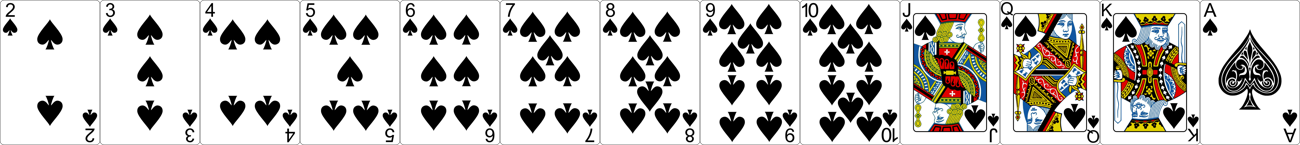

In [15]:
newDeck = np.array(freshDeck).reshape(4,13)
#print(newDeck)
resize_deck(newDeck,52)

now lets rearrange the new deck so that the elements in each suit are no longer ranked by order of the card within suit

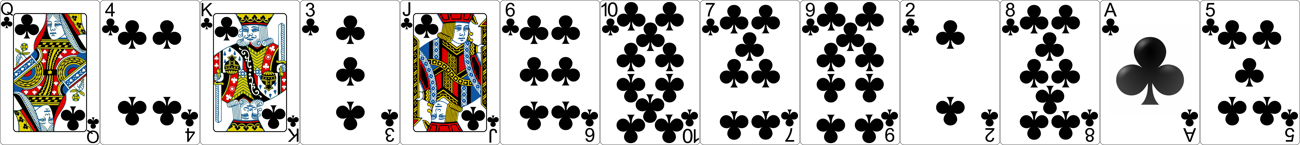

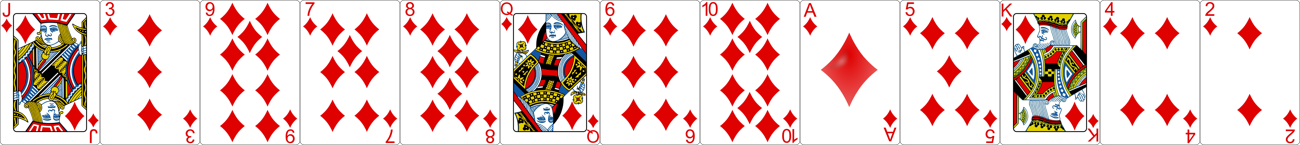

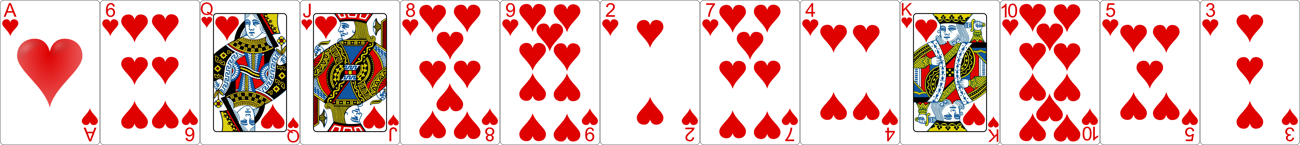

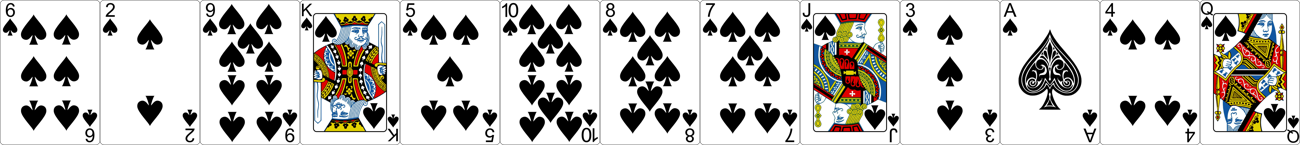

In [16]:
out = rng.permuted(newDeck,axis=1)
#print(out)
resize_deck(out,52)

## Distributions
what is a statistical distribution

list the types, 

Explain use and purpose of five of these
Possibles - Uniform, Normal, Binomial, Pareto, ChiSquare

### Uniform
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

A  uniform distribution is applicable where the possible outcomes are similar to each other. In the case of rolling a dice the odds of getting a number between one and six are 1:6 or 1/6 or one in six or .1667

|Number|Probability|
|-|-|
|1|.1667|
|2|.1667|
|3|.1667|
|4|.1667|
|5|.1667|
|6|.1667|

##### Handmade trial
Setting up a handmade trial where a dice is rolled multiple times and the outcomes recorded. I am not rolling a phyical dice and recording the outcomes but will use the random integers function to simulate multiple rolls. I will the compare the outcome to a trial where the numbers are generated by the uniform distribution function and compare the graphs. They should be similar as the integer distribution function also uses a uniform distribution. They should both(handmade and uniform) produce a rectangular looking plot with the peaks of the bins or bars near the expected probabilities. The expected probabilities are shown as a red line on the plots. 

In [17]:
#set up a dice
dice=[1,2,3,4,5,6]
#set a variable for multiple rolls
no_rolls = 1000

##### Run a trial with a 1000 rolls of the dice

In [18]:
rolls = rng.integers(1,6,size=no_rolls,endpoint=True)

Get the numbers that came up and count how many times they appeared in the trial

In [19]:
values,counts = np.unique(rolls,return_counts=True)

In [20]:
print(f"The numbers:{values} appeared {counts} times respectively in the trial")

The numbers:[1 2 3 4 5 6] appeared [173 155 187 161 172 152] times respectively in the trial


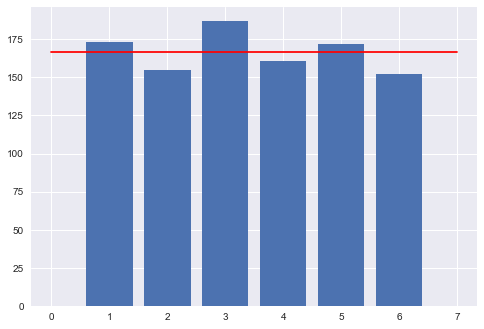

In [21]:
plt.bar(values,counts)
probabilities=np.full(8,.1667*no_rolls)
plt.plot(probabilities,color="r")
plt.show()

From the plot above we can see that the counts of the numbers drawn are nearing the expected probabilities, and that the shape is approaching a rectangular uniform shape

##### Repeat the trial using numbers drawn from the uniform distribution

In [22]:
rolls= rng.uniform(1,7,no_rolls)

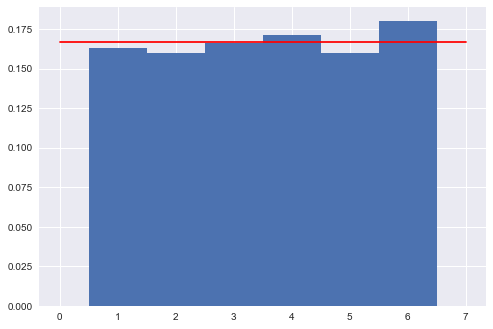

In [23]:
plt.hist(rolls,bins=[1,2,3,4,5,6,7],density=True,align="left")
probabilities=np.full(8,.1667)
plt.plot(probabilities,color="r")
plt.show()

Again we can see a rectagular shape emerging whose height is approaching the expected probabilites for a uniform distribution of the faces of the dice. 
<br>   
The more rolls we sample the closer the bars get to the expected probability for each face of the dice. So increasing the number of trials(rolls) should see the flattening of the tops of the histogram bars around the expected probalities.
<br>
##### Run the trial 100,000 times

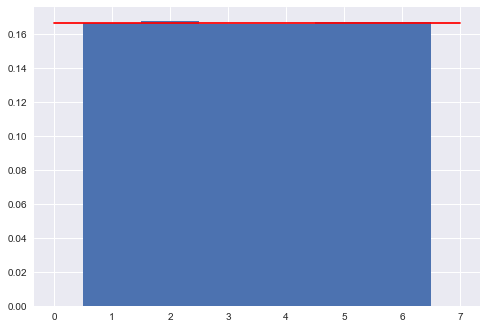

In [24]:
rolls = rng.uniform(1,7,no_rolls*100)
plt.hist(rolls,bins=[1,2,3,4,5,6,7],align='left',density=True)
plt.plot(probabilities,color="r")
plt.show()

##### Conclusion: 
The uniform distribution function in numpy.random is indeed pulling from a uniform distribution and there's no getting away from a one in six chance of your number coming up when rolling a dice!

***   

### Triangular or 2 dice
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.triangular.html#numpy.random.Generator.triangular

Two dice will give the range 2 to 12
with probabilities 0.027777778, 0.055555556, 0.083333333, 0.111111111, 0.138888889, 0.166666667, 0.138888889, 0.111111111, 0.083333333, 0.055555556, 0.027777778


In [25]:
values = [2,3,4,5,6,7,8,9,10,11,12]
probs = [0.027777778,0.055555556,0.083333333,0.111111111,0.138888889,0.166666667,0.138888889,0.111111111,0.083333333,0.055555556,0.027777778]

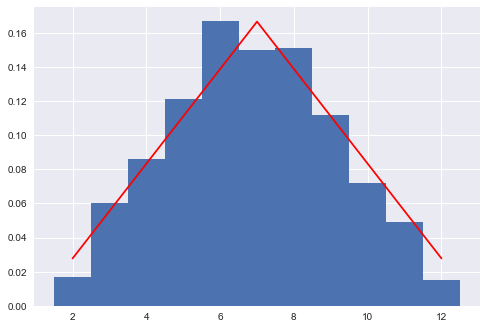

In [26]:
twoDice = rng.triangular(2,7,13,no_rolls)
plt.hist(twoDice,bins=[2,3,4,5,6,7,8,9,10,11,12,13],density=True,align='left')
plt.plot(values,probs,color="r")

### Binomial
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

### Binomial or many dice   

binomial parameters are (n,p,size)   
where n is the number of trials,p is the probability of the outcome and size is the number of tests

need to prove this to myself - what are generated numbers?

2,12 have a probability of .027 when two dice are thrown

In [27]:
manyDice = rng.binomial(100,.027,10000)
print(manyDice)
print(manyDice.mean())  ##<----  this is the way to use it what is the possibility of getting a 1 or a 12 in 100 throws repeated 10000 times
#sum(rng.binomial(9, 0.1, 20000) == 0)/20000. ----still confused!!!
print(sum(manyDice == 2)/10000)
print(manyDice.min())
print(manyDice.max())
values,counts = np.unique(manyDice,return_counts=True)
print(counts,values)


[2 3 3 ... 1 4 7]
2.6896
0.2465
0
11
[ 645 1842 2465 2260 1456  764  367  135   50   10    3    3] [ 0  1  2  3  4  5  6  7  8  9 10 11]


(array([0.32809796, 0.30081193, 0.19379742, 0.1016904 , 0.04884866,
        0.01796885, 0.00665513, 0.00133103, 0.00039931, 0.00039931,
        0.        ]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <BarContainer object of 11 artists>)

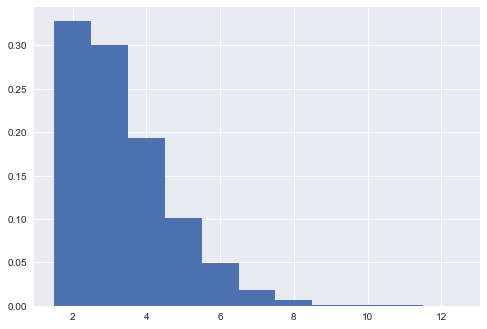

In [28]:
plt.hist(manyDice,bins=[2,3,4,5,6,7,8,9,10,11,12,13],density=True,align="left")
#sns.distplot(manyDice, hist=False, label='binomial')

### Normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

### Three dice
can get between 3 and 18 from three dice
1 dice = 1/6 =.166
2 dice =1/6 * 1/6 = .027
3 dice =1/6 * 1/6 * 1/6 = .004

check this - tired now


In [29]:
possibilities = list(range(3,19))

In [30]:
print(possibilities)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [31]:
probabilities = [0.00462963,0.013888889,0.027777778,0.046296296,0.069444444,0.097222222,0.115740741,0.125,0.125,0.115740741,0.097222222,0.069444444,0.046296296,0.027777778,0.013888889,0.00462963]

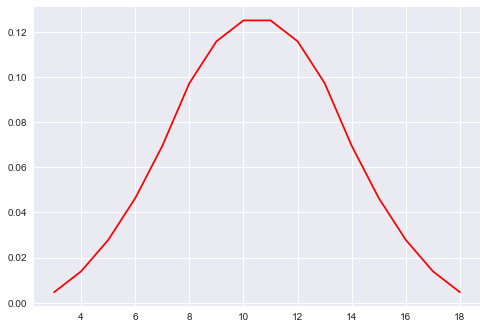

In [32]:
plt.plot(possibilities,probabilities,color="r")

Experiment with handmade "observations"

In [33]:
theDice = [1,2,3,4,5,6]
rng.choice(theDice,1)

array([6])

In [34]:
#roll the three dice ten thousand times
no_throws = 10000
no_of_dice = 3
outcomes = []
for throw in range(no_throws):
    sum_dice = 0
    for dice in range(no_of_dice):
        sum_dice += rng.choice(theDice,1)
    outcomes.append(sum_dice)
outcomes = np.array(outcomes)

In [35]:
print("Mean ",outcomes.mean())
print("Min  ",outcomes.min())
print("Max  ",outcomes.max())
print("sDev ",outcomes.std())

Mean  10.5449
Min   3
Max   18
sDev  2.9392488819424596


In [36]:
#plot the above
print(possibilities)
bins = possibilities.copy()
print(bins)
bins.append(19)
print(bins)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


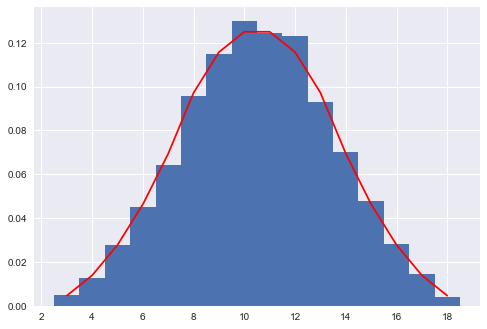

In [37]:
plt.hist(outcomes,bins=bins,density=True,align='left')
plt.plot(possibilities,probabilities,color="r")
plt.show()

Look at normal distribution using the mean and std dev of the "observed"

In [38]:
threeDice=rng.normal(10.54858,2.95,10000)


In [39]:

print(threeDice)

[10.09168074  9.2701451   4.98123753 ...  8.72837522  7.94811033
 11.26871985]


In [40]:
values,counts = np.unique(threeDice,return_counts=True)

In [41]:
print(values,counts)

[-0.15471233  0.18255907  0.36107957 ... 21.17061323 21.28846923
 21.6088739 ] [1 1 1 ... 1 1 1]


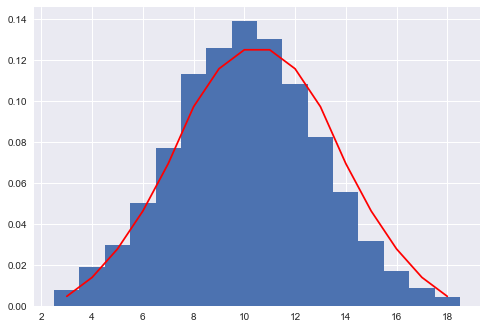

In [42]:
plt.hist(threeDice,bins=bins,density=True,align='left')
plt.plot(possibilities,probabilities,color="r")
#plt.plot(values,counts,color="g")
plt.show()

Rolling dice is a discrete distribution, while the normal distribution, AKA the Gaussian distribution, is continuous by definition. The distribution is technically binomial, which approximates the normal distribution as n gets large.
https://math.stackexchange.com/questions/1482813/is-rolling-a-dice-a-gauss-distribution

### Pareto
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html#numpy.random.Generator.pareto

### ChiSquare
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.chisquare.html#numpy.random.Generator.chisquare

***  

## Seeds
Explain the use of seeds in generating pseudorandom numbers.

***  

## References

https://numpy.org/doc/stable/reference/random/generator.html   
[2] https://numpy.org/doc/stable/reference/random/index.html?highlight=random#quick-start

## Resources

https://www.random.org/randomness/

https://en.wikipedia.org/wiki/Randomness


https://code.google.com/archive/p/vector-playing-cards/downloads
<!---
![2_of_clubs](images/2_of_clubs.svg)
--->
<img src=images/2_of_clubs.svg width=72 height=96)>


In [43]:
#deal 5 cards i.e. randomly select 5 cards from the deck
#this is 5 random samples from the deck it is not dealing from the deck
rng.choice(Deck,5)

NameError: name 'Deck' is not defined

In [ ]:
dist= rng.uniform(.5,4.5,no_rolls)
#print(dist)

In [ ]:
#count, bins, ignored = plt.hist(dist, 4, density=True)
#plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
#plt.show()
plt.hist(dist,4,density=True)

#chances of getting heart,club,spade or diamond are one in 4 or .25
prob=np.full(6,.25)
plt.plot(prob,color="r")
plt.show()

In [ ]:
#increase no_rolls
#no_rolls = 10000
#regen
Rolls = rng.integers(1,7,no_rolls)
#plt.plot(counts,color="g")
#plt.plot(expected,color="r")

expected = np.full(8,.166)
print(expected)
plt.hist(Rolls,bins=[1,2,3,4,5,6,7],density=True,align='left')
plt.plot(expected,color="r")
plt.show()

In [ ]:
plt.show()